In [0]:
!mkdir data

In [0]:
from urllib.request import urlretrieve
import os
url = 'https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip'
save_path = os.path.join('./data', 'celeba.zip')
urlretrieve(url,save_path)

('./data/celeba.zip', <http.client.HTTPMessage at 0x7fcc6c5263c8>)

In [0]:
import zipfile
with zipfile.ZipFile(save_path) as zf:
        zf.extractall('./data')

In [0]:
import os

In [0]:
os.remove(save_path)

In [0]:
names=os.listdir('data/img_align_celeba')
len(names)

202599

In [0]:
names[0]

'201721.jpg'

(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)


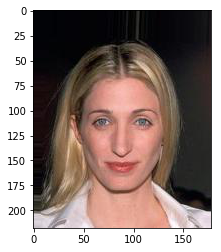

In [0]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
for i in range(0,25):
  image=Image.open('data/img_align_celeba/'+names[-i])
  print(image.size)
  image=np.array(image.convert('RGB'))
  plt.imshow(image)

In [0]:
def preprocess(paths,width,height,mode):
  image_data=[]
  face_width=108
  face_height=128
  for i in range(len(paths)):
    img=Image.open('data/img_align_celeba/'+paths[i])
    i=(img.size[0]-face_width)//2
    j=(img.size[1]-face_height)//2
    img=img.crop([i,j,i+face_width,j+face_height])
    img=img.resize([width,height],Image.LANCZOS)
    img=np.array(img.convert(mode))
    image_data.append(img)
  return np.array(image_data)

In [0]:
image_data=preprocess(names,64,64,'RGB')

In [0]:
# image_data=image_data.astype(np.float64)

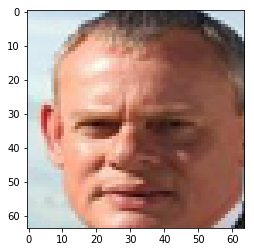

In [0]:
plt.imshow(image_data[200005])

In [0]:
def scale(x):
  x=((x-x.min())/(255-x.min()))
  min,max=-1,1
  x=x*(max-min)+min
  return x

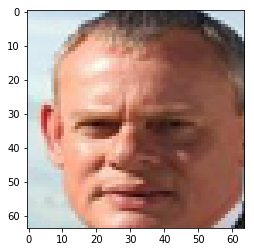

In [0]:
x=image_data[200005]/255
plt.imshow(x)

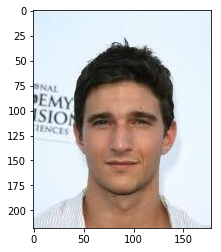

In [0]:
plt.imshow(Image.open('data/img_align_celeba/'+names[102]))

In [0]:
import tensorflow.keras
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,UpSampling2D,BatchNormalization,Flatten,Activation,Reshape,Conv2DTranspose,LeakyReLU,Dropout,Input,ZeroPadding2D
import keras

Using TensorFlow backend.


In [0]:
def Discriminator(image_shape=(28,28,3)):
    image_shape = image_shape
    
    dropout_prob = 0.4
    
    #kernel_init = RandomNormal(mean=0.0, stddev=0.01)
    kernel_init = 'glorot_uniform'
    
    dis_input = Input(shape = image_shape)
    
    discriminator = Conv2D(filters = 64, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(dis_input)
    discriminator = LeakyReLU(0.2)(discriminator)
    #discriminator = MaxPooling2D(pool_size=(2, 2))(discriminator)
    
    #discriminator = Dropout(dropout_prob)(discriminator)
    discriminator = Conv2D(filters = 128, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(discriminator)
    discriminator = BatchNormalization(momentum = 0.5)(discriminator)
    discriminator = LeakyReLU(0.2)(discriminator)
    #discriminator = MaxPooling2D(pool_size=(2, 2))(discriminator)
    
    #discriminator = Dropout(dropout_prob)(discriminator)
    discriminator = Conv2D(filters = 256, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(discriminator)
    discriminator = BatchNormalization(momentum = 0.5)(discriminator)
    discriminator = LeakyReLU(0.2)(discriminator)
    #discriminator = MaxPooling2D(pool_size=(2, 2))(discriminator)
    
    #discriminator = Dropout(dropout_prob)(discriminator)
    discriminator = Conv2D(filters = 512, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(discriminator)
    discriminator = BatchNormalization(momentum = 0.5)(discriminator)
    discriminator = LeakyReLU(0.2)(discriminator)
    #discriminator = MaxPooling2D(pool_size=(2, 2))(discriminator)
    
    discriminator = Flatten()(discriminator)
    
    #discriminator = MinibatchDiscrimination(100,5)(discriminator)
    discriminator = Dense(1)(discriminator)
    discriminator = Activation('sigmoid')(discriminator)
    
    dis_opt = keras.optimizers.Adam(lr=0.0002, beta_1=0.5)
    discriminator_model = Model(input = dis_input, output = discriminator)
    discriminator_model.compile(loss='binary_crossentropy', optimizer=dis_opt)
    discriminator_model.summary()
    return discriminator_model

In [0]:
def Discriminator64x64(image_shape=(64,64,3)):
    image_shape = image_shape
    
    dropout_prob = 0.4
    
    #kernel_init = RandomNormal(mean=0.0, stddev=0.01)
    kernel_init = 'truncated_normal'
    
    dis_input = Input(shape = image_shape)
    
    discriminator = Conv2D(filters = 64, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(dis_input)
    discriminator = LeakyReLU(0.2)(discriminator)
    #discriminator = MaxPooling2D(pool_size=(2, 2))(discriminator)
    
    #discriminator = Dropout(dropout_prob)(discriminator)
    discriminator = Conv2D(filters = 128, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(discriminator)
    discriminator = BatchNormalization(momentum = 0.5)(discriminator)
    discriminator = LeakyReLU(0.2)(discriminator)
    #discriminator = MaxPooling2D(pool_size=(2, 2))(discriminator)
    
    #discriminator = Dropout(dropout_prob)(discriminator)
    discriminator = Conv2D(filters = 256, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(discriminator)
    discriminator = BatchNormalization(momentum = 0.5)(discriminator)
    discriminator = LeakyReLU(0.2)(discriminator)
    #discriminator = MaxPooling2D(pool_size=(2, 2))(discriminator)
    
    #discriminator = Dropout(dropout_prob)(discriminator)
    discriminator = Conv2D(filters = 512, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(discriminator)
    discriminator = BatchNormalization(momentum = 0.5)(discriminator)
    discriminator = LeakyReLU(0.2)(discriminator)
    #discriminator = MaxPooling2D(pool_size=(2, 2))(discriminator)
    
    discriminator = Flatten()(discriminator)
    
    #discriminator = MinibatchDiscrimination(100,5)(discriminator)
    discriminator = Dense(1)(discriminator)
    discriminator = Activation('sigmoid')(discriminator)
    
    dis_opt = keras.optimizers.Adam(lr=0.0002, beta_1=0.5)
    discriminator_model = Model(input = dis_input, output = discriminator)
    discriminator_model.compile(loss='binary_crossentropy', optimizer=dis_opt)
    discriminator_model.summary()
    return discriminator_model

In [0]:
z_size=(1,1,100)

In [0]:
def Generator():
    noise_shape = z_size
    """
    Changing padding = 'same' in the first layer makes a lot fo difference!!!!
    """
    #kernel_init = RandomNormal(mean=0.0, stddev=0.01)
    kernel_init = 'glorot_uniform'
    
    gen_input = Input(shape = noise_shape) #if want to directly use with conv layer next
    #gen_input = Input(shape = [noise_shape]) #if want to use with dense layer next
    
    generator = Conv2DTranspose(filters = 512, kernel_size = (7,7), strides = (1,1), padding = "valid", data_format = "channels_last", kernel_initializer = kernel_init)(gen_input)
    generator = BatchNormalization(momentum = 0.5)(generator)
    generator = LeakyReLU(0.2)(generator)
        
    #generator = bilinear2x(generator,256,kernel_size=(4,4))
    # generator = UpSampling2D(size=(2, 2))(generator)
    #generator = SubPixelUpscaling(scale_factor=2)(generator)
    # generator = Conv2D(filters = 256, kernel_size = (4,4), strides = (1,1), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
    generator = Conv2DTranspose(filters = 256, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
    generator = BatchNormalization(momentum = 0.5)(generator)
    generator = LeakyReLU(0.2)(generator)
    
    #generator = bilinear2x(generator,128,kernel_size=(4,4))
    # generator = UpSampling2D(size=(2, 2))(generator)
    #generator = SubPixelUpscaling(scale_factor=2)(generator)
    # generator = Conv2D(filters = 128, kernel_size = (4,4), strides = (1,1), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
    generator = Conv2DTranspose(filters = 128, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
    generator = BatchNormalization(momentum = 0.5)(generator)
    generator = LeakyReLU(0.2)(generator)
    
    #generator = bilinear2x(generator,64,kernel_size=(4,4))
    #generator = UpSampling2D(size=(2, 2))(generator)
    #generator = SubPixelUpscaling(scale_factor=2)(generator)
#     #generator = Conv2D(filters = 64, kernel_size = (4,4), strides = (1,1), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)    
#     generator = Conv2DTranspose(filters = 64, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
#     generator = BatchNormalization(momentum = 0.5)(generator)
#     generator = LeakyReLU(0.2)(generator)
    
#     generator = Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
#     generator = BatchNormalization(momentum = 0.5)(generator)
#     generator = LeakyReLU(0.2)(generator)
    
    #generator = bilinear2x(generator,3,kernel_size=(3,3))
    #generator = UpSampling2D(size=(2, 2))(generator)
    #generator = SubPixelUpscaling(scale_factor=2)(generator)
    #generator = Conv2D(filters = 3, kernel_size = (4,4), strides = (1,1), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
    generator = Conv2DTranspose(filters = 3, kernel_size = (4,4), strides = (1,1), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
    generator = Activation('tanh')(generator)
        
    gen_opt = keras.optimizers.Adam(lr=0.00015, beta_1=0.5)
    generator_model = Model(input = gen_input, output = generator)
    generator_model.compile(loss='binary_crossentropy', optimizer=gen_opt)
    generator_model.summary()

    return generator_model

In [0]:
def Generator64x64():
    noise_shape = z_size
    """
    Changing padding = 'same' in the first layer makes a lot fo difference!!!!
    """
    #kernel_init = RandomNormal(mean=0.0, stddev=0.01)
    kernel_init = 'truncated_normal'
    
    gen_input = Input(shape = noise_shape) #if want to directly use with conv layer next
    #gen_input = Input(shape = [noise_shape]) #if want to use with dense layer next
    
    generator = Conv2DTranspose(filters = 512, kernel_size = (4,4), strides = (1,1), padding = "valid", data_format = "channels_last", kernel_initializer = kernel_init)(gen_input)
    generator = BatchNormalization(momentum = 0.5)(generator)
    generator = LeakyReLU(0.2)(generator)
        
    #generator = bilinear2x(generator,256,kernel_size=(4,4))
    # generator = UpSampling2D(size=(2, 2))(generator)
    #generator = SubPixelUpscaling(scale_factor=2)(generator)
    # generator = Conv2D(filters = 256, kernel_size = (4,4), strides = (1,1), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
    generator = Conv2DTranspose(filters = 256, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
    generator = BatchNormalization(momentum = 0.5)(generator)
    generator = LeakyReLU(0.2)(generator)
    
    #generator = bilinear2x(generator,128,kernel_size=(4,4))
    # generator = UpSampling2D(size=(2, 2))(generator)
    #generator = SubPixelUpscaling(scale_factor=2)(generator)
    # generator = Conv2D(filters = 128, kernel_size = (4,4), strides = (1,1), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
    generator = Conv2DTranspose(filters = 128, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
    generator = BatchNormalization(momentum = 0.5)(generator)
    generator = LeakyReLU(0.2)(generator)
    
    #generator = bilinear2x(generator,64,kernel_size=(4,4))
    # generator = UpSampling2D(size=(2, 2))(generator)
    #generator = SubPixelUpscaling(scale_factor=2)(generator)
    # generator = Conv2D(filters = 64, kernel_size = (4,4), strides = (1,1), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)    
    generator = Conv2DTranspose(filters = 64, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
    generator = BatchNormalization(momentum = 0.5)(generator)
    generator = LeakyReLU(0.2)(generator)
    
#     generator = Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
#     generator = BatchNormalization(momentum = 0.5)(generator)
#     generator = LeakyReLU(0.2)(generator)
    
    #generator = bilinear2x(generator,3,kernel_size=(3,3))
    # generator = UpSampling2D(size=(2, 2))(generator)
    #generator = SubPixelUpscaling(scale_factor=2)(generator)
    # generator = Conv2D(filters = 32, kernel_size = (4,4), strides = (1,1), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
    generator = BatchNormalization(momentum = 0.5)(generator)
    generator = LeakyReLU(0.2)(generator)  
    generator = Conv2DTranspose(filters = 32, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
#     generator = Activation('tanh')(generator)
        
    generator = Conv2DTranspose(filters = 3, kernel_size = (4,4), strides = (1,1), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
    generator = Activation('tanh')(generator)
    
    gen_opt = keras.optimizers.Adam(lr=0.00015, beta_1=0.5)
    generator_model = Model(input = gen_input, output = generator)
    generator_model.compile(loss='binary_crossentropy', optimizer=gen_opt)
    generator_model.summary()

    return generator_model

In [0]:
test_g=Generator64x64()

W0731 05:58:07.649402 140141507798912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0731 05:58:07.697364 140141507798912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0731 05:58:07.704557 140141507798912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0731 05:58:07.747128 140141507798912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0731 05:58:07.748258

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 1, 100)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 4, 4, 512)         819712    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 512)         2048      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 8, 8, 256)         2097408   
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 256)         0         
__________

In [0]:
def DCGAN(gen,dis):
  dis.trainable = False

  opt = keras.optimizers.Adam(lr=0.00015, beta_1=0.5) #same as gen
  gen_inp = Input(shape=z_size)
  GAN_inp = gen(gen_inp)
  GAN_opt = dis(GAN_inp)
  gan = Model(input = gen_inp, output = GAN_opt)
  gan.compile(loss = 'binary_crossentropy', optimizer = opt, metrics=['accuracy'])
  gan.summary()
  return gan

In [0]:
real_size = (64,64,3)
z_size = (1,1,100)
learning_rate = 0.0002
batch_size = 512
epochs = 5
alpha = 0.2
beta1 = 0.5

In [0]:
import matplotlib.gridspec as gridspec

In [0]:
def denorm_img(img):
    img = (img + 1) * 127.5
    return img.astype(np.uint8) 

In [0]:
def view_samples(epoch, samples, nrows, ncols, figsize=(8,8)):
    fig, axes = plt.subplots(figsize=figsize, nrows=nrows, ncols=ncols, 
                             sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        ax.axis('off')
#         img = ((img - img.min())*255 / (img.max() - img.min())).astype(np.uint8)
        ax.set_adjustable('box-forced')
        im = ax.imshow(img, aspect='equal')
    plt.subplots_adjust(wspace=0, hspace=0)
    return fig, axes

In [0]:
def generate_images(generator,noise):
#     noise = np.random.uniform(0,1,size=(batch_size,)+z_size)
    #using noise produced by np.random.uniform - the generator seems to produce same image for ANY noise - 
    #but those images (even though they are the same) are very close to the actual image - experiment with it later.
    fake_data_X = generator.predict(noise)
    print("Displaying generated images")
    plt.figure(figsize=(4,4))
    gs1 = gridspec.GridSpec(4, 4)
    gs1.update(wspace=0, hspace=0)
    rand_indices = np.random.choice(fake_data_X.shape[0],16,replace=False)
    for i in range(16):
        #plt.subplot(4, 4, i+1)
        ax1 = plt.subplot(gs1[i])
        ax1.set_aspect('equal')
        rand_index = rand_indices[i]
        image = fake_data_X[rand_index, :,:,:]
        fig = plt.imshow(image)
        plt.axis('off')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
    plt.tight_layout()
#     plt.savefig(save_dir+str(time.time())+"_GENERATEDimage.png",bbox_inches='tight',pad_inches=0)
    plt.show()

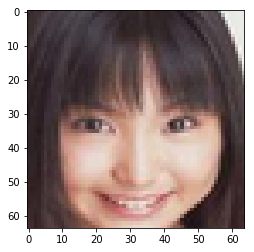

In [0]:
plt.imshow(image_data[0,:,:,:]/255)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def train(batch_size,learning_rate,beta1):
  samples=[]
  gen=Generator()
  dis=Discriminator()
  dcgan=DCGAN(gen,dis)
#   gen_opt=keras.optimizers.Adam(lr=learning_rate)
#   dis_opt=keras.optimizers.Adam(lr=learning_rate)
#   gen.compile(loss='binary_crossentropy',optimizer=gen_opt)
#   dcgan.compile(loss='binary_crossentropy',optimizer=gen_opt)
  dis.trainable=True
#   dis.compile(loss='binary_crossentropy',optimizer=dis_opt)
  for epoch in range(epochs):
    print("Epoch is {} Number of batches {}".format(epoch,int(image_data.shape[0]//batch_size)))
    for index in range(image_data.shape[0]//batch_size):

      noise=np.random.uniform(0,1,size=(batch_size,)+z_size)
      image_batch = image_data[index*batch_size:(index+1)*batch_size]/255
#       image_batch=scale(image_batch)
      generated_images = gen.predict(noise, verbose=0)

      if index % 100 == 0:
          generate_images(gen,noise)

      X=np.concatenate([image_batch,generated_images])

      real_y=np.ones(batch_size) - np.random.random_sample(batch_size)*0.2
      fake_y=np.random.random_sample(batch_size)*0.2

      y = np.concatenate((real_y,fake_y))

      dis.trainable=True
      gen.trainable=False

      dis_metrics_real = dis.train_on_batch(image_batch,real_y)   #training seperately on real
      dis_metrics_fake = dis.train_on_batch(generated_images,fake_y)   #training seperately on fake
      d_loss=dis_metrics_real+dis_metrics_fake
      
      noise=np.random.uniform(0,1,size=(batch_size,)+z_size)

      dis.trainable=False
      gen.trainable=True

      g_loss=dcgan.train_on_batch(noise,real_y)

      if index%20==19:
        print("batch {} d_loss {} g_loss {}".format(index,d_loss,g_loss))
      if index % 20== 19:
        gen.save_weights('drive/My Drive/generator', True)
        dis.save_weights('drive/My Drive/discriminator', True)


In [0]:
def train64x64(batch_size,learning_rate,beta1):
  samples=[]
  gen=Generator64x64()
  dis=Discriminator64x64()
  dcgan=DCGAN(gen,dis)
#   gen_opt=keras.optimizers.Adam(lr=learning_rate)
#   dis_opt=keras.optimizers.Adam(lr=learning_rate)
#   gen.compile(loss='binary_crossentropy',optimizer=gen_opt)
#   dcgan.compile(loss='binary_crossentropy',optimizer=gen_opt)
  dis.trainable=True
#   dis.compile(loss='binary_crossentropy',optimizer=dis_opt)
  noise=np.random.uniform(0,1,size=(batch_size,)+z_size)
  for epoch in range(epochs):
    print("Epoch is {} Number of batches {}".format(epoch,int(image_data.shape[0]//batch_size)))
    for index in range(image_data.shape[0]//batch_size):

      
      image_batch = image_data[index*batch_size:(index+1)*batch_size]/255
#       image_batch=scale(image_batch)
      generated_images = gen.predict(noise, verbose=0)

      if index % 100 == 0:
          generate_images(gen,noise)

      X=np.concatenate([image_batch,generated_images])

      real_y=np.ones(batch_size) - np.random.random_sample(batch_size)*0.2
      fake_y=np.random.random_sample(batch_size)*0.2

      y = np.concatenate((real_y,fake_y))

      dis.trainable=True
      gen.trainable=False

      dis_metrics_real = dis.train_on_batch(image_batch,real_y)   #training seperately on real
      dis_metrics_fake = dis.train_on_batch(generated_images,fake_y)   #training seperately on fake
      d_loss=dis_metrics_real+dis_metrics_fake
      
      noise_gan=np.random.uniform(0,1,size=(batch_size,)+z_size)

      dis.trainable=False
      gen.trainable=True

      g_loss=dcgan.train_on_batch(noise,real_y)

      if index%20==19:
        print("batch {} d_loss {} g_loss {}".format(index,d_loss,g_loss))
      if index % 20== 19:
        gen.save_weights('drive/My Drive/generator64x64', True)
        dis.save_weights('drive/My Drive/discriminator64x64', True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 1, 1, 100)         0         
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 4, 4, 512)         819712    
_________________________________________________________________
batch_normalization_32 (Batc (None, 4, 4, 512)         2048      
_________________________________________________________________
leaky_re_lu_34 (LeakyReLU)   (None, 4, 4, 512)         0         
_________________________________________________________________
up_sampling2d_21 (UpSampling (None, 8, 8, 512)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 8, 8, 256)         2097408   
_________________________________________________________________
batch_normalization_33 (Batc (None, 8, 8, 256)         1024      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 64)        3136      
_________________________________________________________________
leaky_re_lu_39 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 128)       131200    
_________________________________________________________________
batch_normalization_37 (Batc (None, 16, 16, 128)       512       
_________________________________________________________________
leaky_re_lu_40 (LeakyReLU)   (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 8, 8, 256)         524544    
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("mo...)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 1, 1, 100)         0         
_________________________________________________________________
model_10 (Model)             (None, 64, 64, 3)         3610979   
_________________________________________________________________
model_11 (Model)             (None, 1)                 2768321   
Total params: 6,379,300
Trainable params: 3,608,995
Non-trainable params: 2,770,305
_________________________________________________________________
Epoch is 0 Number of batches 395


W0723 20:10:09.330599 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:10:09.344027 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:10:09.355838 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:10:09.366542 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:10:09.377818 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:10:09.389297 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:10:09.400296 140516

Displaying generated images


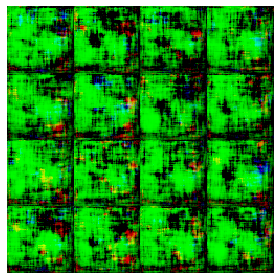

batch 19 d_loss 1.2489749193191528 g_loss [6.541812, 0.0]
batch 39 d_loss 0.7167973518371582 g_loss [1.5760669, 0.0]
batch 59 d_loss 1.756909728050232 g_loss [11.649526, 0.0]
batch 79 d_loss 1.228301763534546 g_loss [8.08852, 0.0]
batch 99 d_loss 5.2135396003723145 g_loss [7.9753356, 0.0]


W0723 20:12:50.555771 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:12:50.568526 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:12:50.580746 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:12:50.591022 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:12:50.602881 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:12:50.613315 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:12:50.623884 140516

Displaying generated images


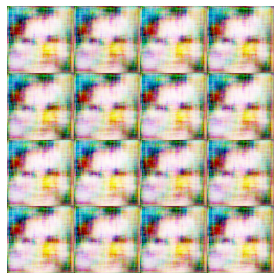

batch 119 d_loss 0.9837548732757568 g_loss [1.6308069, 0.0]
batch 139 d_loss 0.7704490423202515 g_loss [2.6400878, 0.0]
batch 159 d_loss 1.2549972534179688 g_loss [3.3787284, 0.0]
batch 179 d_loss 1.1989665031433105 g_loss [2.2510653, 0.0]
batch 199 d_loss 0.7580374479293823 g_loss [2.718943, 0.0]


W0723 20:15:12.785607 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:15:12.797065 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:15:12.808083 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:15:12.818310 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:15:12.828594 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:15:12.838897 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:15:12.850522 140516

Displaying generated images


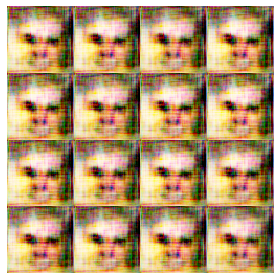

batch 219 d_loss 1.1637778282165527 g_loss [2.7507489, 0.0]
batch 239 d_loss 0.9049652814865112 g_loss [3.414232, 0.0]
batch 259 d_loss 1.0009369850158691 g_loss [4.2674026, 0.0]
batch 279 d_loss 0.9052318334579468 g_loss [2.6264327, 0.0]
batch 299 d_loss 1.1582082509994507 g_loss [2.9046845, 0.0]


W0723 20:17:34.337028 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:17:34.349038 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:17:34.359968 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:17:34.371860 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:17:34.382241 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:17:34.393252 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:17:34.405947 140516

Displaying generated images


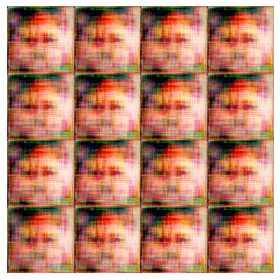

batch 319 d_loss 0.7479432821273804 g_loss [2.2105093, 0.0]
batch 339 d_loss 0.7321081161499023 g_loss [2.2010098, 0.0]
batch 359 d_loss 0.8189085721969604 g_loss [2.2509642, 0.0]
batch 379 d_loss 0.7510576248168945 g_loss [2.3225446, 0.0]
Epoch is 1 Number of batches 395


W0723 20:19:47.814973 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:19:47.827293 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:19:47.838306 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:19:47.849247 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:19:47.860661 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:19:47.871845 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:19:47.885914 140516

Displaying generated images


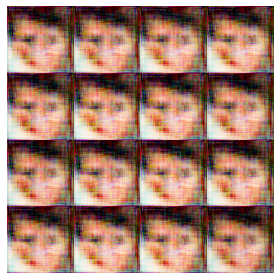

batch 19 d_loss 0.8170787692070007 g_loss [2.7442784, 0.0]
batch 39 d_loss 0.905165433883667 g_loss [3.7174911, 0.0]
batch 59 d_loss 0.842719316482544 g_loss [2.735824, 0.0]
batch 79 d_loss 0.7411292791366577 g_loss [2.5793877, 0.0]
batch 99 d_loss 0.7059069275856018 g_loss [2.4167833, 0.0]


W0723 20:22:10.748186 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:22:10.760960 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:22:10.773484 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:22:10.784248 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:22:10.794181 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:22:10.805125 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:22:10.816414 140516

Displaying generated images


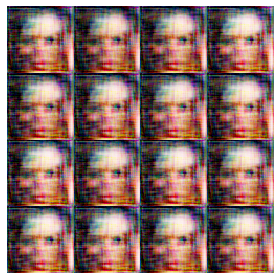

batch 119 d_loss 1.1477158069610596 g_loss [4.967695, 0.0]
batch 139 d_loss 0.7133910655975342 g_loss [2.2559092, 0.0]
batch 159 d_loss 0.6879783272743225 g_loss [2.1865768, 0.0]
batch 179 d_loss 0.7394706010818481 g_loss [2.2695816, 0.0]
batch 199 d_loss 0.848101019859314 g_loss [2.061536, 0.0]


W0723 20:24:32.582190 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:24:32.595328 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:24:32.606487 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:24:32.617904 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:24:32.629035 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:24:32.640233 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:24:32.653971 140516

Displaying generated images


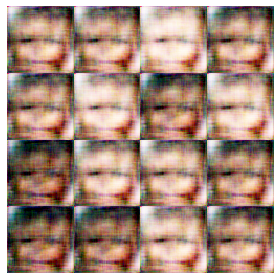

batch 219 d_loss 0.8336447477340698 g_loss [2.1819534, 0.0]
batch 239 d_loss 0.7301598787307739 g_loss [2.2167895, 0.0]
batch 259 d_loss 1.2714838981628418 g_loss [7.050481, 0.0]
batch 279 d_loss 1.5296605825424194 g_loss [6.945059, 0.0]
batch 299 d_loss 0.8649197816848755 g_loss [2.8892767, 0.0]


W0723 20:26:53.746589 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:26:53.758820 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:26:53.770869 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:26:53.782286 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:26:53.793514 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:26:53.804423 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:26:53.816524 140516

Displaying generated images


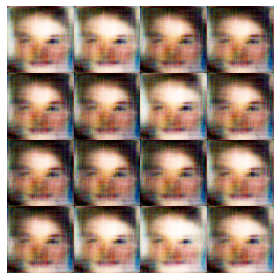

batch 319 d_loss 1.0769360065460205 g_loss [3.426396, 0.0]
batch 339 d_loss 0.9431092143058777 g_loss [3.8701515, 0.0]
batch 359 d_loss 0.9213390946388245 g_loss [3.1836078, 0.0]
batch 379 d_loss 0.8479312658309937 g_loss [3.4056141, 0.0]
Epoch is 2 Number of batches 395


W0723 20:29:07.366605 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:29:07.378641 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:29:07.391399 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:29:07.401641 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:29:07.412497 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:29:07.422729 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:29:07.433820 140516

Displaying generated images


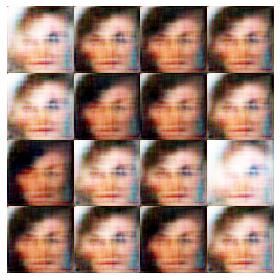

batch 19 d_loss 0.8055404424667358 g_loss [2.4949496, 0.0]
batch 39 d_loss 0.8804240822792053 g_loss [3.1772661, 0.0]
batch 59 d_loss 0.7950313687324524 g_loss [3.0479345, 0.0]
batch 79 d_loss 0.7554429769515991 g_loss [2.3208175, 0.0]
batch 99 d_loss 0.7791233062744141 g_loss [2.479938, 0.0]


W0723 20:31:28.894115 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:31:28.906496 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:31:28.917441 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:31:28.930161 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:31:28.940957 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:31:28.952301 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:31:28.965000 140516

Displaying generated images


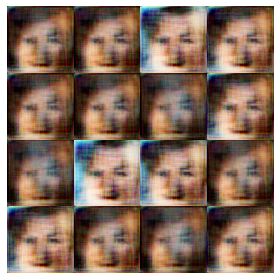

batch 119 d_loss 0.9982087016105652 g_loss [2.4334834, 0.0]
batch 139 d_loss 0.7456860542297363 g_loss [2.4444385, 0.0]
batch 159 d_loss 0.9133908748626709 g_loss [2.4407632, 0.0]
batch 179 d_loss 1.0393913984298706 g_loss [3.8881392, 0.0]
batch 199 d_loss 0.9751428365707397 g_loss [4.2700667, 0.0]


W0723 20:33:50.365567 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:33:50.378784 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:33:50.389774 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:33:50.400840 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:33:50.414804 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:33:50.425324 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:33:50.439417 140516

Displaying generated images


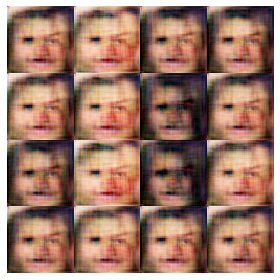

batch 219 d_loss 0.8739806413650513 g_loss [3.3426344, 0.0]
batch 239 d_loss 0.9154678583145142 g_loss [4.0280247, 0.0]
batch 259 d_loss 0.8807970285415649 g_loss [3.5165782, 0.0]
batch 279 d_loss 0.9481760859489441 g_loss [4.2313113, 0.0]
batch 299 d_loss 0.9889166355133057 g_loss [3.2473216, 0.0]


W0723 20:36:11.621549 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:36:11.632997 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:36:11.644836 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:36:11.657236 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:36:11.667636 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:36:11.677708 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:36:11.689604 140516

Displaying generated images


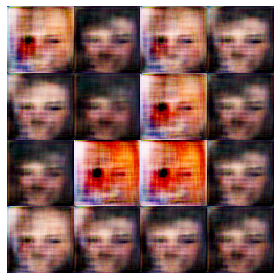

batch 319 d_loss 0.9604980945587158 g_loss [3.4794712, 0.0]
batch 339 d_loss 0.9880450367927551 g_loss [4.323478, 0.0]
batch 359 d_loss 0.7385324835777283 g_loss [2.2899537, 0.0]
batch 379 d_loss 0.7477839589118958 g_loss [2.457586, 0.0]
Epoch is 3 Number of batches 395


W0723 20:38:24.795573 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:38:24.808140 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:38:24.829036 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:38:24.839670 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:38:24.852109 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:38:24.865037 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:38:24.876462 140516

Displaying generated images


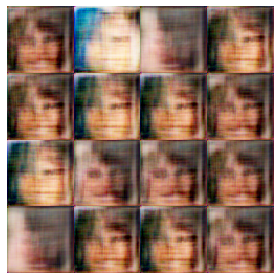

batch 19 d_loss 0.7405251264572144 g_loss [2.2026777, 0.0]
batch 39 d_loss 0.7857029438018799 g_loss [2.8101022, 0.0]
batch 59 d_loss 1.2677874565124512 g_loss [3.0001912, 0.0]
batch 79 d_loss 0.7865869998931885 g_loss [2.1214218, 0.0]
batch 99 d_loss 0.8983327150344849 g_loss [2.6849601, 0.0]


W0723 20:40:46.587475 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:40:46.600015 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:40:46.611032 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:40:46.623407 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:40:46.634790 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:40:46.646190 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:40:46.659399 140516

Displaying generated images


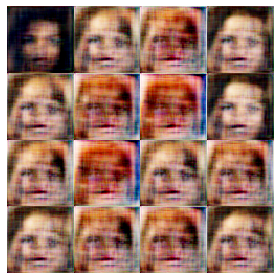

batch 119 d_loss 0.818758487701416 g_loss [2.1241229, 0.0]
batch 139 d_loss 0.7950897812843323 g_loss [2.1090174, 0.0]
batch 159 d_loss 0.7331342697143555 g_loss [2.105903, 0.0]
batch 179 d_loss 0.8146220445632935 g_loss [2.3440247, 0.0]
batch 199 d_loss 0.8080778121948242 g_loss [2.3689804, 0.0]


W0723 20:43:10.982898 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:43:10.996031 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:43:11.007591 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:43:11.018013 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:43:11.028854 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:43:11.039352 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:43:11.051472 140516

Displaying generated images


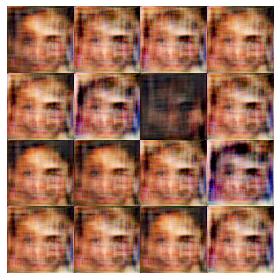

batch 219 d_loss 0.9065404534339905 g_loss [2.7289298, 0.0]
batch 239 d_loss 0.739606499671936 g_loss [2.4336562, 0.0]
batch 259 d_loss 0.7439486980438232 g_loss [2.115132, 0.0]
batch 279 d_loss 0.9118423461914062 g_loss [3.658426, 0.0]
batch 299 d_loss 0.7485776543617249 g_loss [2.3287778, 0.0]


W0723 20:45:32.975420 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:45:32.988861 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:45:33.002472 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:45:33.013523 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:45:33.024593 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:45:33.035309 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:45:33.047632 140516

Displaying generated images


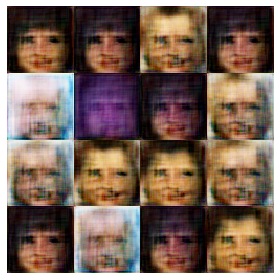

batch 319 d_loss 0.8162961602210999 g_loss [2.8538873, 0.0]
batch 339 d_loss 0.7355821132659912 g_loss [2.44459, 0.0]
batch 359 d_loss 0.9272930026054382 g_loss [2.26943, 0.0]
batch 379 d_loss 0.7490891218185425 g_loss [2.3355725, 0.0]
Epoch is 4 Number of batches 395


W0723 20:47:46.964059 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:47:46.975831 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:47:46.986875 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:47:46.998430 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:47:47.009661 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:47:47.020624 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:47:47.031902 140516

Displaying generated images


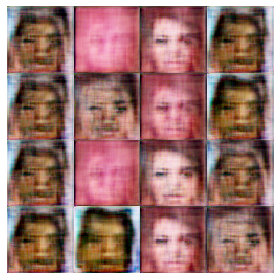

batch 19 d_loss 0.9325524568557739 g_loss [4.060171, 0.0]
batch 39 d_loss 0.8348837494850159 g_loss [3.2844155, 0.0]
batch 59 d_loss 0.8381220698356628 g_loss [3.0198007, 0.0]
batch 79 d_loss 0.875326931476593 g_loss [3.0404515, 0.0]
batch 99 d_loss 0.7915061712265015 g_loss [2.8622167, 0.0]


W0723 20:50:08.140166 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:50:08.153013 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:50:08.165035 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:50:08.175586 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:50:08.185838 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:50:08.195871 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:50:08.207423 140516

Displaying generated images


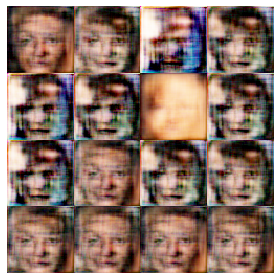

batch 119 d_loss 0.8091467618942261 g_loss [3.3459163, 0.0]
batch 139 d_loss 1.0334038734436035 g_loss [2.4618053, 0.0]
batch 159 d_loss 0.9373756647109985 g_loss [2.448498, 0.0]
batch 179 d_loss 0.771994411945343 g_loss [2.666567, 0.0]
batch 199 d_loss 0.7842029333114624 g_loss [2.019025, 0.0]


W0723 20:52:29.851360 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:52:29.864535 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:52:29.877460 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:52:29.889564 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:52:29.902794 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:52:29.915193 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:52:29.928124 140516

Displaying generated images


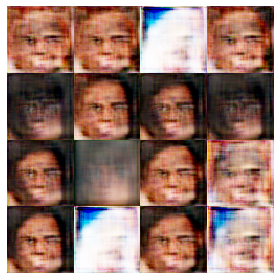

batch 219 d_loss 0.8412893414497375 g_loss [4.2204485, 0.0]
batch 239 d_loss 0.8179551362991333 g_loss [3.0344403, 0.0]
batch 259 d_loss 0.7454184293746948 g_loss [2.3898525, 0.0]
batch 279 d_loss 0.8801592588424683 g_loss [2.6357586, 0.0]
batch 299 d_loss 0.7870286703109741 g_loss [3.001718, 0.0]


W0723 20:54:51.855363 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:54:51.866969 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:54:51.879526 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:54:51.891528 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:54:51.904805 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:54:51.916928 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 20:54:51.929862 140516

Displaying generated images


W0723 20:54:52.046123 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


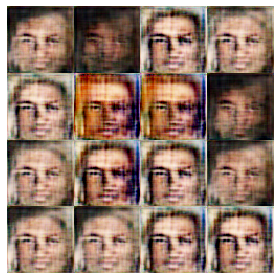

batch 319 d_loss 0.8508294820785522 g_loss [3.3462346, 0.0]
batch 339 d_loss 0.9248253107070923 g_loss [3.2406378, 0.0]
batch 359 d_loss 1.0824565887451172 g_loss [3.912195, 0.0]
batch 379 d_loss 0.801826536655426 g_loss [2.7314744, 0.0]


In [0]:
train64x64(batch_size,learning_rate,beta1)

In [0]:
import numpy as np

In [0]:
# test_d=Discriminator()
test_g=Generator64x64()
# test_d.load_weights('drive/My Drive/discriminator')
test_g.load_weights('drive/My Drive/generator64x64')
# real=test_d.predict(np.reshape(scale(image_data[102]),(1,28,28,3)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 1, 1, 100)         0         
_________________________________________________________________
conv2d_transpose_13 (Conv2DT (None, 4, 4, 512)         819712    
_________________________________________________________________
batch_normalization_40 (Batc (None, 4, 4, 512)         2048      
_________________________________________________________________
leaky_re_lu_43 (LeakyReLU)   (None, 4, 4, 512)         0         
_________________________________________________________________
up_sampling2d_25 (UpSampling (None, 8, 8, 512)         0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 8, 8, 256)         2097408   
_________________________________________________________________
batch_normalization_41 (Batc (None, 8, 8, 256)         1024      
__________

W0723 21:24:13.414581 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 21:24:13.427088 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 21:24:13.437629 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 21:24:13.448569 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 21:24:13.459039 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 21:24:13.470279 140516624041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0723 21:24:13.481636 140516

Displaying generated images


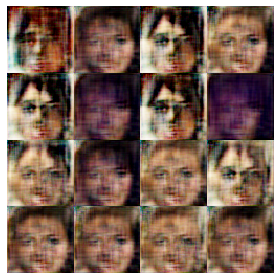

In [0]:
import matplotlib.pyplot as plt
noise=np.random.uniform(0,1,size=(16,1,1,100))
generate_images(test_g,noise)